# **Project Name - Phone Data Analysis**

**Project Type -** Exploratory Data Analysis

# **Project Summary -**
The Phone Data Analysis project involves analyzing a dataset of phone usage activities, aiming to identify trends and insights into user behavior based on call durations, data usage, network preferences, and activity types. The dataset includes information on the type of activity (calls or data), the duration of each activity, the associated mobile network, and the timestamp of each event.

Data Exploration and Cleaning: Investigated the structure and content of the dataset, handling missing values and converting columns to appropriate data types.

Duration Analysis: Explored how call and data usage durations vary across different networks and activity types, identifying patterns in usage behavior.

Time-Based Trends: Examined the dataset by month to identify any seasonal trends or spikes in activity. This involved plotting call and data activity trends over time.

Network Preference: Analyzed network usage patterns, determining which networks are preferred by users for calls or data usage, and how usage differs by network type (mobile vs. data).

Visualization: Generated insightful visualizations, including line plots and bar charts, to represent usage trends over time, the distribution of call durations, and network preferences.

The project provided valuable insights into the patterns of phone usage, offering actionable recommendations for telecom companies to optimize services, enhance customer engagement, and tailor marketing campaigns based on user behavior. By understanding the relationship between activity types, network choices, and time periods, the analysis helps improve operational decisions and customer satisfaction.


# **GitHub Link -**


# **Problem Statement**
**Usage Patterns and Network Optimization:** How can telecom companies leverage phone usage patterns to optimize network performance and allocate resources effectively

**Customer Behavior and Service Personalization:** What insights from phone usage data can help design personalized customer plans and improve user retention

The goal is to provide actionable insights that can guide decision-making for telecom providers, helping optimize network performance, improve customer satisfaction, and develop targeted marketing campaigns based on usage trends and preferences.



# **General Guidlines : -**
1.well structured ,Formatted and coomented code is required

2.Handle missing values, duplicates, and inconsistencies.

3.Standardize data formats for dates, numerical values, and categorical variables.

4.Each and Every Logic Should have proper Coments

5.Utilize Matplotlib and Seaborn for at least 5 visualizations, such as:

.Distribution plots for booking lead times.

.Bar charts to compare room types or meal plans.

.Heatmaps for correlations between variables.

.Line plots for trends in booking patterns over time.

.Box plots to analyze variability in special requests.

6.Analysis and Insights

.Trend and Business analysis of Customers

7.Summarize the analysis and findings in a well-structured report or presentation.

8.Include visualizations, key statistics, and actionable recommendations.

9.Tools and Libraries

Pandas: For data manipulation and aggregation.

Matplotlib & Seaborn: For creating visualizations

# ***Let's Begin !!!***

# ***1.Know your Data***

# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Load

In [2]:

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/phone_data.csv')

## Data First view

In [34]:
# Displaying First five rows of the dataset
data.head()

,index,date,duration,item,month,network,network_type
0,0,15/10/14 06:58,34.429,data,2014-11,data,data
1,1,15/10/14 06:58,13.000,call,2014-11,Vodafone,mobile
2,2,15/10/14 14:46,23.000,call,2014-11,Meteor,mobile
3,3,15/10/14 14:48,4.000,call,2014-11,Tesco,mobile
4,4,15/10/14 17:27,4.000,call,2014-11,Tesco,mobile


CHECKING FOR NULL & NAN VALUES IN THE DATA

In [35]:
# Checking for total null values present in the data set
data.isnull().sum()

,0
index,0
date,0
duration,0
item,0
month,0
network,0
network_type,0


CHANGING DATE FORMAT

In [36]:
# Chagnging data format using to_datetime function
data['date'] = pd.to_datetime(data['date'],format = '%d/%m/%y %H:%M')

In [37]:
# Extracting and  storing Time data into time column
data['time'] = data['date'].dt.time

In [38]:
# Extracting and  storing day_of_week data into time column
data['day_of_week'] = data['date'].dt.day_of_week

In [39]:
# Extracting and  storing date data into time column

data['date'] = data['date'].dt.date

In [40]:
# Chaging time format in data set
data['time'] = pd.to_datetime(data['time'], format='%H:%M:%S')

In [41]:
# Assigning time data to time_
data['time_'] = data['time']

In [42]:
# Extracting and  storing hour data into time column
data['hour'] = data['time'].dt.hour

In [43]:
data.head()

,index,date,duration,item,month,network,network_type,time,day_of_week,time_,hour
0,0,2014-10-15,34.429,data,2014-11,data,data,1900-01-01 06:58:00,2,1900-01-01 06:58:00,6
1,1,2014-10-15,13.000,call,2014-11,Vodafone,mobile,1900-01-01 06:58:00,2,1900-01-01 06:58:00,6
2,2,2014-10-15,23.000,call,2014-11,Meteor,mobile,1900-01-01 14:46:00,2,1900-01-01 14:46:00,14
3,3,2014-10-15,4.000,call,2014-11,Tesco,mobile,1900-01-01 14:48:00,2,1900-01-01 14:48:00,14
4,4,2014-10-15,4.000,call,2014-11,Tesco,mobile,1900-01-01 17:27:00,2,1900-01-01 17:27:00,17


DATA TRANSFORMATION

In [44]:
# defining a  user defined function
def get_time(x):
  if x < 10:
    return 'Short_duration'
  elif 10 <= x < 30:
    return 'Medium_duration'
  else:
    return 'Long_duration'

In [45]:
# Applying a user defined by using apply method  and storing it into duration_category
data['duration_category'] = data['duration'].apply(get_time)

In [46]:
data.head()

,index,date,duration,item,month,network,network_type,time,day_of_week,time_,hour,duration_category
0,0,2014-10-15,34.429,data,2014-11,data,data,1900-01-01 06:58:00,2,1900-01-01 06:58:00,6,Long_duration
1,1,2014-10-15,13.000,call,2014-11,Vodafone,mobile,1900-01-01 06:58:00,2,1900-01-01 06:58:00,6,Medium_duration
2,2,2014-10-15,23.000,call,2014-11,Meteor,mobile,1900-01-01 14:46:00,2,1900-01-01 14:46:00,14,Medium_duration
3,3,2014-10-15,4.000,call,2014-11,Tesco,mobile,1900-01-01 14:48:00,2,1900-01-01 14:48:00,14,Short_duration
4,4,2014-10-15,4.000,call,2014-11,Tesco,mobile,1900-01-01 17:27:00,2,1900-01-01 17:27:00,17,Short_duration


In [47]:
# defining a  user defined function

def take_time_slot(x):
  if 0 < x < 4 :
    return 'Mid Night'
  elif 4 < x < 12:
    return 'Morning'
  elif 12 < x < 16:
    return 'Afternoon'
  elif 16 < x < 20:
    return 'Evening'
  else:
    return 'Night'

In [48]:
#Applying a user defined by using apply method and storing it into timeslot column
data['time_slot'] = data['hour'].apply(take_time_slot)

In [49]:
data.head()

,index,date,duration,item,month,network,network_type,time,day_of_week,time_,hour,duration_category,time_slot
0,0,2014-10-15,34.429,data,2014-11,data,data,1900-01-01 06:58:00,2,1900-01-01 06:58:00,6,Long_duration,Morning
1,1,2014-10-15,13.000,call,2014-11,Vodafone,mobile,1900-01-01 06:58:00,2,1900-01-01 06:58:00,6,Medium_duration,Morning
2,2,2014-10-15,23.000,call,2014-11,Meteor,mobile,1900-01-01 14:46:00,2,1900-01-01 14:46:00,14,Medium_duration,Afternoon
3,3,2014-10-15,4.000,call,2014-11,Tesco,mobile,1900-01-01 14:48:00,2,1900-01-01 14:48:00,14,Short_duration,Afternoon
4,4,2014-10-15,4.000,call,2014-11,Tesco,mobile,1900-01-01 17:27:00,2,1900-01-01 17:27:00,17,Short_duration,Evening


DROPING UNWANTED COLUMNS FROM THE DATA

In [50]:
# DROPING UNWANTED COLUMNS FROM THE DATA
data = data.drop(columns = ['time','index'])

In [51]:
# Checking the data set information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 830 entries, 0 to 829
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               830 non-null    object        
 1   duration           830 non-null    float64       
 2   item               830 non-null    object        
 3   month              830 non-null    object        
 4   network            830 non-null    object        
 5   network_type       830 non-null    object        
 6   day_of_week        830 non-null    int32         
 7   time_              830 non-null    datetime64[ns]
 8   hour               830 non-null    int32         
 9   duration_category  830 non-null    object        
 10  time_slot          830 non-null    object        
dtypes: datetime64[ns](1), float64(1), int32(2), object(7)
memory usage: 65.0+ KB


In [52]:
# we are Defining the Extracted month  to a specific period by using to_period method

data['date'] = pd.to_datetime(data['date'], format='%d/%m/%y %H:%M')

data['extracted_month'] = data['date'].dt.to_period('M').astype(str)

data['month_aligned'] = data['month'] == data['extracted_month']

data.loc[data['month']!=data['extracted_month'],'month'] =data['extracted_month']

print(data[['date', 'month', 'extracted_month', 'month_aligned']])

          date    month extracted_month  month_aligned
0   2014-10-15  2014-10         2014-10          False
1   2014-10-15  2014-10         2014-10          False
2   2014-10-15  2014-10         2014-10          False
3   2014-10-15  2014-10         2014-10          False
4   2014-10-15  2014-10         2014-10          False
..         ...      ...             ...            ...
825 2015-03-13  2015-03         2015-03           True
826 2015-03-13  2015-03         2015-03           True
827 2015-03-13  2015-03         2015-03           True
828 2015-03-14  2015-03         2015-03           True
829 2015-03-14  2015-03         2015-03           True

[830 rows x 4 columns]


In [53]:
# Droping the column
data = data.drop(columns = ['month_aligned'])

In [54]:
data.head()

,date,duration,item,month,network,network_type,day_of_week,time_,hour,duration_category,time_slot,extracted_month
0,2014-10-15,34.429,data,2014-10,data,data,2,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10
1,2014-10-15,13.000,call,2014-10,Vodafone,mobile,2,1900-01-01 06:58:00,6,Medium_duration,Morning,2014-10
2,2014-10-15,23.000,call,2014-10,Meteor,mobile,2,1900-01-01 14:46:00,14,Medium_duration,Afternoon,2014-10
3,2014-10-15,4.000,call,2014-10,Tesco,mobile,2,1900-01-01 14:48:00,14,Short_duration,Afternoon,2014-10
4,2014-10-15,4.000,call,2014-10,Tesco,mobile,2,1900-01-01 17:27:00,17,Short_duration,Evening,2014-10


**Total Duration by Networks**

.How can you calculate the total duration of calls (duration column) grouped by network?

.How can you filter the rows where the item is call and the duration is greater than 10 seconds?

In [55]:
# How can you calculate the total duration of calls (duration column) grouped by network
total_duration_of_calls = data.groupby('network')['duration'].sum()
total_duration_of_calls


,duration
network,
Meteor,7233.00
Tesco,13841.00
Three,36551.00
Vodafone,14770.00
data,5164.35
landline,18433.00
special,3.00
voicemail,1775.00
world,7.00


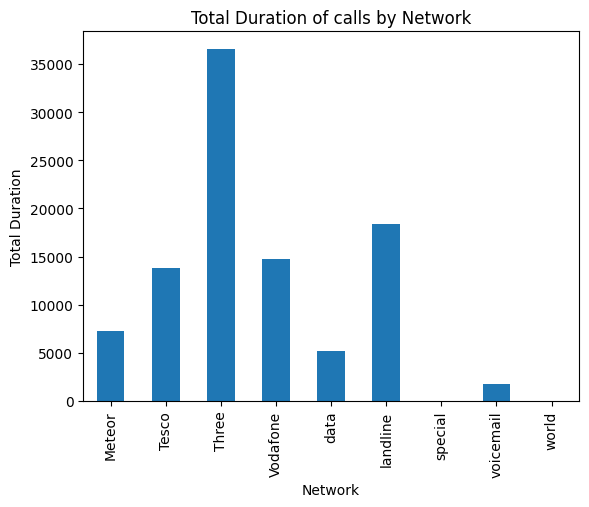

In [56]:
# Ploting a bar chart for total  duration of networks
total_duration_of_calls.plot(kind ='bar')
plt.title('Total Duration of calls by Network')
plt.xlabel('Network')
plt.ylabel("Total Duration")
plt.show()

In [57]:
#How can you filter the rows where the item is call and the duration is greater than 10 seconds?
duration_greater_than_10 = data[(data['item']== 'call') & (data['duration']>10)]
duration_greater_than_10

,date,duration,item,month,network,network_type,day_of_week,time_,hour,duration_category,time_slot,extracted_month
1,2014-10-15,13.0,call,2014-10,Vodafone,mobile,2,1900-01-01 06:58:00,6,Medium_duration,Morning,2014-10
2,2014-10-15,23.0,call,2014-10,Meteor,mobile,2,1900-01-01 14:46:00,14,Medium_duration,Afternoon,2014-10
7,2014-10-16,602.0,call,2014-10,Three,mobile,3,1900-01-01 15:01:00,15,Long_duration,Afternoon,2014-10
8,2014-10-16,1050.0,call,2014-10,Three,mobile,3,1900-01-01 15:12:00,15,Long_duration,Afternoon,2014-10
9,2014-10-16,19.0,call,2014-10,voicemail,voicemail,3,1900-01-01 15:30:00,15,Medium_duration,Afternoon,2014-10
...,...,...,...,...,...,...,...,...,...,...,...,...
807,2015-03-03,745.0,call,2015-03,Vodafone,mobile,1,1900-01-01 10:12:00,10,Long_duration,Morning,2015-03
808,2015-03-03,57.0,call,2015-03,Vodafone,mobile,1,1900-01-01 10:27:00,10,Long_duration,Morning,2015-03
809,2015-03-03,1325.0,call,2015-03,Vodafone,mobile,1,1900-01-01 14:34:00,14,Long_duration,Afternoon,2015-03
810,2015-03-03,768.0,call,2015-03,Three,mobile,1,1900-01-01 18:36:00,18,Long_duration,Evening,2015-03


In [58]:
# Checking for unique values in the column
data['network'].unique()

array(['data', 'Vodafone', 'Meteor', 'Tesco', 'Three', 'voicemail',
       'landline', 'special', 'world'], dtype=object)

In [59]:
# Displaying total duration of calls  by network type
total_duration_by_network_type = data.groupby('network_type')['duration'].sum()
total_duration_by_network_type

,duration
network_type,
data,5164.35
landline,18433.00
mobile,72395.00
special,3.00
voicemail,1775.00
world,7.00


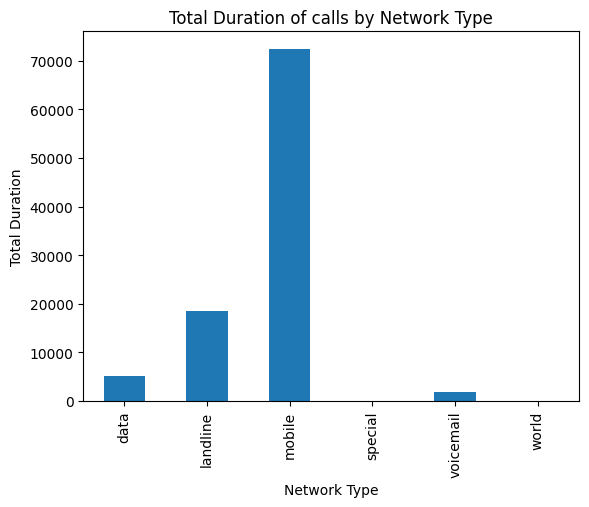

In [60]:
# Ploting a bar chart for Total Duration of calls by Network Type
total_duration_by_network_type.plot(x='network_type',y='duration',kind='bar')
plt.title('Total Duration of calls by Network Type')
plt.xlabel('Network Type')
plt.ylabel("Total Duration")
plt.show()

**Data Aggregations:**

.How can you compute the average duration of calls for each month (month column)?

.How can you count the number of occurrences of each item type?

.How can you calculate the total duration of data usage (item column) for each network?

.Calculate the total duration of calls for each network.

.Calculate the average duration of calls grouped by network_type.



In [61]:
# How can you compute the average duration of calls for each month (month column)
avg_duration_per_month = data.groupby('month')['duration'].mean()
avg_duration_per_month

,duration
month,
2014-10,152.525162
2014-11,78.898106
2014-12,96.333127
2015-01,117.291710
2015-02,101.830610
2015-03,387.373769


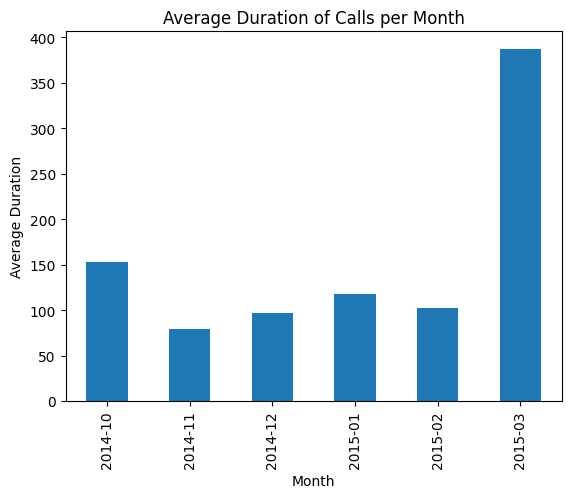

In [62]:
# Ploting a bar chcart for Average Duration of Calls per Month
avg_duration_per_month.plot(kind='bar')
plt.title('Average Duration of Calls per Month')
plt.xlabel('Month')
plt.ylabel("Average Duration")
plt.show()


In [63]:
# How can you calculate the total duration of data usage (item column) for each network
sum_of_total_data = data[data['item'] == 'data']
sum_of_total_data.groupby('network')['duration'].sum()


,duration
network,
data,5164.35


In [64]:
# How can you count the number of occurrences of each item type
number_of_occurence = data.groupby('item')['item'].value_counts()
number_of_occurence

,count
item,
call,388
data,150
sms,292


In [65]:
# Calculate the total duration of calls for each network.
calls_duration = data[data['item'] == 'call']

calls_duration_per_network = calls_duration.groupby('network')['duration'].sum()

calls_duration_per_network

,duration
network,
Meteor,7200.0
Tesco,13828.0
Three,36464.0
Vodafone,14621.0
landline,18433.0
voicemail,1775.0


In [66]:
#.Calculate the average duration of calls for each network.
calls_duration = data[data['item'] == 'call']

calls_duration_per_network = calls_duration.groupby('network')['duration'].mean()

calls_duration_per_network

,duration
network,
Meteor,133.333333
Tesco,194.760563
Three,284.875000
Vodafone,221.530303
landline,438.880952
voicemail,65.740741


**3.Data Cleaning :**

How can you handle missing values if any exist in the duration column?

How can you ensure that all values in the month column are in YYYY-MM format?

Check for duplicate rows in the dataset and remove them if any exist.



In [67]:
# How can you handle missing values if any exist in the duration column
# Checking for missing values in the duration column
missing_values = data['duration'].isnull().sum()
missing_values

0

In [68]:
# Filling the missing values in the dataset bys using mean of the same duration column
filling_missing_values = data['duration'].fillna(data['duration'].mean())
filling_missing_values

,duration
0,34.429
1,13.000
2,23.000
3,4.000
4,4.000
...,...
825,1.000
826,1.000
827,34.429
828,1.000


In [69]:
# How can you ensure that all values in the month column are in YYYY-MM format
print(data['month'].unique())
# Matching the specific pattern
import re
pattern = r'^\d{4}-\d{2}$'
invalid_months = data[~data['month'].str.match(pattern)]
print("Invalid months:", invalid_months)


['2014-10' '2014-11' '2014-12' '2015-01' '2015-02' '2015-03']
Invalid months: Empty DataFrame
Columns: [date, duration, item, month, network, network_type, day_of_week, time_, hour, duration_category, time_slot, extracted_month]
Index: []


In [70]:
# Droping duplicate rows from the data set
data = data.drop_duplicates()
data

,date,duration,item,month,network,network_type,day_of_week,time_,hour,duration_category,time_slot,extracted_month
0,2014-10-15,34.429,data,2014-10,data,data,2,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10
1,2014-10-15,13.000,call,2014-10,Vodafone,mobile,2,1900-01-01 06:58:00,6,Medium_duration,Morning,2014-10
2,2014-10-15,23.000,call,2014-10,Meteor,mobile,2,1900-01-01 14:46:00,14,Medium_duration,Afternoon,2014-10
3,2014-10-15,4.000,call,2014-10,Tesco,mobile,2,1900-01-01 14:48:00,14,Short_duration,Afternoon,2014-10
4,2014-10-15,4.000,call,2014-10,Tesco,mobile,2,1900-01-01 17:27:00,17,Short_duration,Evening,2014-10
...,...,...,...,...,...,...,...,...,...,...,...,...
825,2015-03-13,1.000,sms,2015-03,world,world,4,1900-01-01 00:38:00,0,Short_duration,Night,2015-03
826,2015-03-13,1.000,sms,2015-03,Vodafone,mobile,4,1900-01-01 00:39:00,0,Short_duration,Night,2015-03
827,2015-03-13,34.429,data,2015-03,data,data,4,1900-01-01 06:58:00,6,Long_duration,Morning,2015-03
828,2015-03-14,1.000,sms,2015-03,world,world,5,1900-01-01 00:13:00,0,Short_duration,Night,2015-03


**Customizing the data :**

 How can you find the top 3 networks based on the total duration of calls?

How can you filter out rows where network_type is not mobile?

In [71]:
#  Grouping on networks  column and calculating  total duration of calls and taking first 3 maximum calls
network_bases = data.groupby('network')['duration'].sum()
top_3_networks = network_bases.nlargest(3)
top_3_networks

,duration
network,
Three,36528.0
landline,18433.0
Vodafone,14736.0


In [72]:
# Filtering rows where network_type not in mobile
filtering_networks = data[data['network_type'] != 'mobile']
filtering_networks

,date,duration,item,month,network,network_type,day_of_week,time_,hour,duration_category,time_slot,extracted_month
0,2014-10-15,34.429,data,2014-10,data,data,2,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10
6,2014-10-16,34.429,data,2014-10,data,data,3,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10
9,2014-10-16,19.000,call,2014-10,voicemail,voicemail,3,1900-01-01 15:30:00,15,Medium_duration,Afternoon,2014-10
13,2014-10-17,34.429,data,2014-10,data,data,4,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10
26,2014-10-18,34.429,data,2014-10,data,data,5,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10
...,...,...,...,...,...,...,...,...,...,...,...,...
824,2015-03-12,34.429,data,2015-03,data,data,3,1900-01-01 06:58:00,6,Long_duration,Morning,2015-03
825,2015-03-13,1.000,sms,2015-03,world,world,4,1900-01-01 00:38:00,0,Short_duration,Night,2015-03
827,2015-03-13,34.429,data,2015-03,data,data,4,1900-01-01 06:58:00,6,Long_duration,Morning,2015-03
828,2015-03-14,1.000,sms,2015-03,world,world,5,1900-01-01 00:13:00,0,Short_duration,Night,2015-03


**Data Transformations:**

How can you convert the duration column from seconds to minutes and store it in a new column called duration_in_minutes?

How can you group the data by month and calculate the sum of duration for each item type?

In [73]:
# Coverting seconds into minutes by dividing duration by 60
data['duration_in_minutes'] = data['duration']/60

In [74]:
# Extracting total duration by month and item columns
grouped_by_month_for_each_data_type = data.groupby(['month','item'])['duration'].sum()
grouped_by_month_for_each_data_type

month    item
2014-10  call    16309.000
         data      585.293
         sms        31.000
2014-11  call    16777.000
         data     1032.870
         sms        83.000
2014-12  call    14861.000
         data     1067.299
         sms        46.000
2015-01  call    18705.000
         data     1067.299
         sms        36.000
2015-02  call    11019.000
         data      964.012
         sms        22.000
2015-03  call    14647.000
         data      447.577
         sms        10.000
Name: duration, dtype: float64

In [75]:
data.head()

,date,duration,item,month,network,network_type,day_of_week,time_,hour,duration_category,time_slot,extracted_month,duration_in_minutes
0,2014-10-15,34.429,data,2014-10,data,data,2,1900-01-01 06:58:00,6,Long_duration,Morning,2014-10,0.573817
1,2014-10-15,13.000,call,2014-10,Vodafone,mobile,2,1900-01-01 06:58:00,6,Medium_duration,Morning,2014-10,0.216667
2,2014-10-15,23.000,call,2014-10,Meteor,mobile,2,1900-01-01 14:46:00,14,Medium_duration,Afternoon,2014-10,0.383333
3,2014-10-15,4.000,call,2014-10,Tesco,mobile,2,1900-01-01 14:48:00,14,Short_duration,Afternoon,2014-10,0.066667
4,2014-10-15,4.000,call,2014-10,Tesco,mobile,2,1900-01-01 17:27:00,17,Short_duration,Evening,2014-10,0.066667


**Exploratory Data Problems**

Find the most frequently occurring network for each network_type.

Identify the row with the longest call duration.



In [76]:
 # Grouping network_type on network to extract most frequent value
 most_frequent = data.groupby('network_type')['network'].apply(lambda x: x.value_counts().idxmax())
 most_frequent

,network
network_type,
data,data
landline,landline
mobile,Three
special,special
voicemail,voicemail
world,world


In [77]:
# extracting the row with longest call  duration
longest_call_duration = data[data['item'] == 'call']['duration'].max()
longest_call_duration

10528.0

**Identify Peak Usage**

Identify the time of day with the highest average duration for each network_type.

Comparison of Call and Data Usage
Compare the total duration of call versus data across all network_type.

time_slot
Evening    178.90604
Name: duration, dtype: float64


<Axes: xlabel='time_slot'>

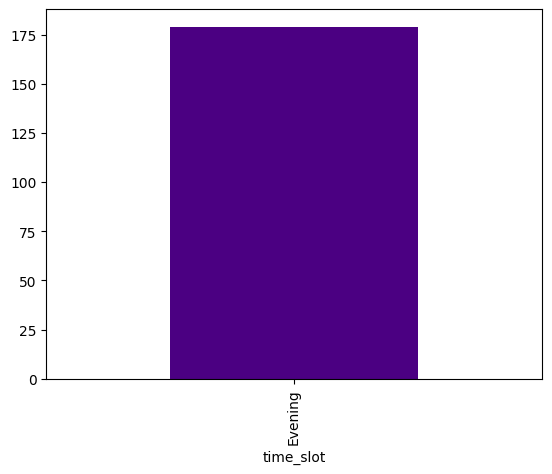

In [78]:
time_of_day = data.groupby('time_slot')['duration'].mean().nlargest(1)
print(time_of_day)
time_of_day.plot(x= 'time_slot',y = 'duration',kind = 'bar', legend=False, color='indigo')

In [79]:
items = data[data['item'].isin([ 'call', 'data' ]) ]
usage_comparison = items.groupby('item')['duration'].sum()
usage_comparison

,duration
item,
call,92318.00
data,5164.35


**Data Visualization:**

How can you create a bar chart to show the total duration of calls for each network?

How can you plot a time series graph showing duration over time using the date column?

---



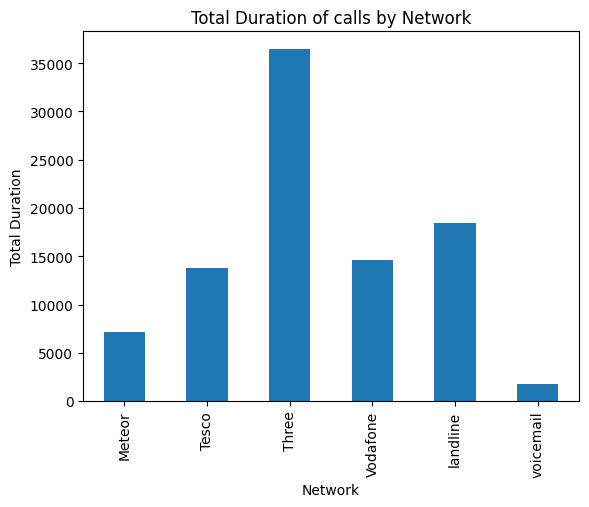

In [80]:
# Ploting a bar chart for otal duration of calls for each network
calls_duration = data[data['item'] == 'call']
total_duration_of_calls = calls_duration.groupby('network')['duration'].sum()
total_duration_of_calls.plot(kind ='bar')
plt.title('Total Duration of calls by Network')
plt.xlabel('Network')
plt.ylabel("Total Duration")
plt.show()

Text(0, 0.5, 'duration')

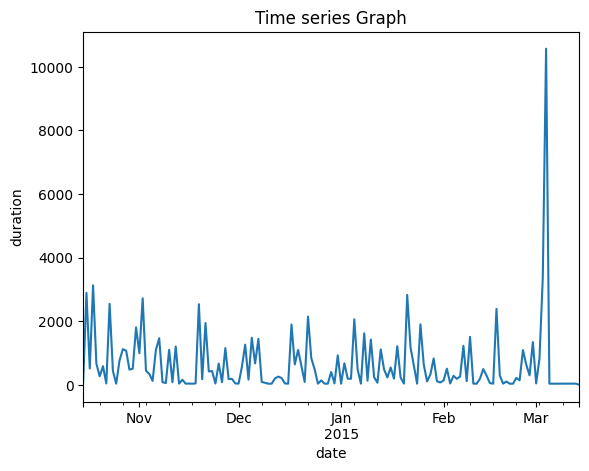

In [81]:
# time series graph showing duration over time
duration_over_time = data.groupby('date')['duration'].sum()
duration_over_time.plot(kind = 'line')
plt.title('Time series Graph')
plt.xlabel('date')
plt.ylabel('duration')

In [82]:
data.columns

Index(['date', 'duration', 'item', 'month', 'network', 'network_type',
       'day_of_week', 'time_', 'hour', 'duration_category', 'time_slot',
       'extracted_month', 'duration_in_minutes'],
      dtype='object')

In [83]:
data['item'].unique()

array(['data', 'call', 'sms'], dtype=object)

# **Usage Patterns and Trends**

What are the peak hours for phone usage (calls, data)

How does usage vary across different months or days of the week

What is the average duration of calls and data sessions

In [84]:
# What are the peak hours for phone usage (calls, data)

peak_hours = data[(data['item'] == 'call' ) | (data['item'] == 'data')].groupby('time_slot')['duration'].sum().reset_index()
peak_hours

,time_slot,duration
0,Afternoon,21523.00
1,Evening,26612.00
2,Mid Night,285.00
3,Morning,17966.35
4,Night,31096.00


<ipython-input-85-c7de36e2e2c3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='time_slot', y='duration', data=peak_hours, palette='coolwarm')


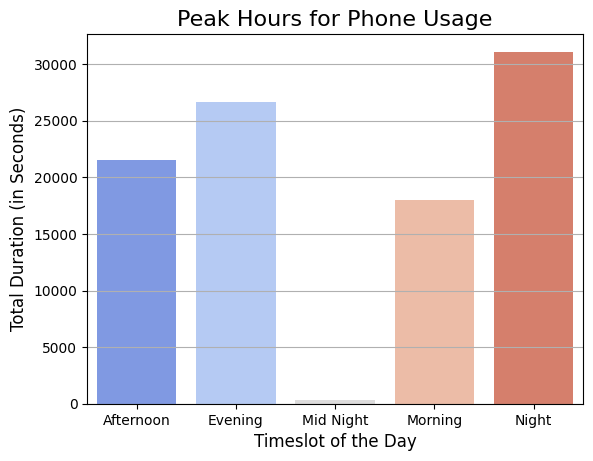

In [85]:
# Ploting a Seaborn bar plot
sns.barplot(x='time_slot', y='duration', data=peak_hours, palette='coolwarm')
plt.title('Peak Hours for Phone Usage', fontsize=16)
plt.xlabel('Timeslot of the Day', fontsize=12)
plt.ylabel('Total Duration (in Seconds)', fontsize=12)
plt.grid(axis='y')
plt.show()

In [86]:
# How does usage vary across different months or days of the week

usage_across_months = data.groupby('month')['duration'].sum().reset_index()
usage_across_months

,month,duration
0,2014-10,16925.293
1,2014-11,17892.870
2,2014-12,15974.299
3,2015-01,19808.299
4,2015-02,12005.012
5,2015-03,15104.577


In [87]:
# Filter data for calls and data sessions
filtered_data = data[data['item'].isin(['call', 'data'])]

# Group by 'item' and calculate the average duration
average_duration = filtered_data.groupby('item')['duration'].mean().reset_index()
average_duration.columns = ['Item', 'Average Duration']

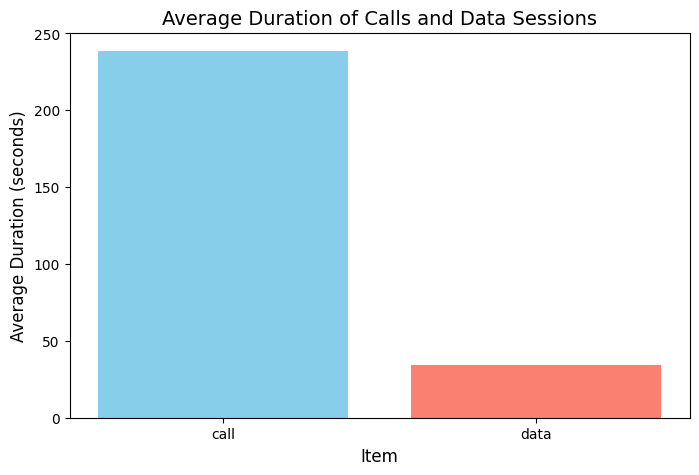

In [88]:
# Plot the average duration
plt.figure(figsize=(8, 5))
plt.bar(average_duration['Item'], average_duration['Average Duration'], color=['skyblue', 'salmon'])
plt.title('Average Duration of Calls and Data Sessions', fontsize=14)
plt.xlabel('Item', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.show()

**Activity Type Analysis**

Which activity type (call, data) is the most frequent?

How does the duration differ between calls and data usage?

In [89]:
#  most frequentactivity type
activity_type= data[data['item'].isin(['call','data'])]

activity_type_most_freq = activity_type.groupby('item')['item'].value_counts().idxmax()
activity_type_most_freq

'call'

  Activity Type  Average Duration
0          call        238.547804
1          data         34.429000


<ipython-input-90-9279d0e86af6>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Activity Type', y='Average Duration', data=duration_difference, palette='coolwarm')


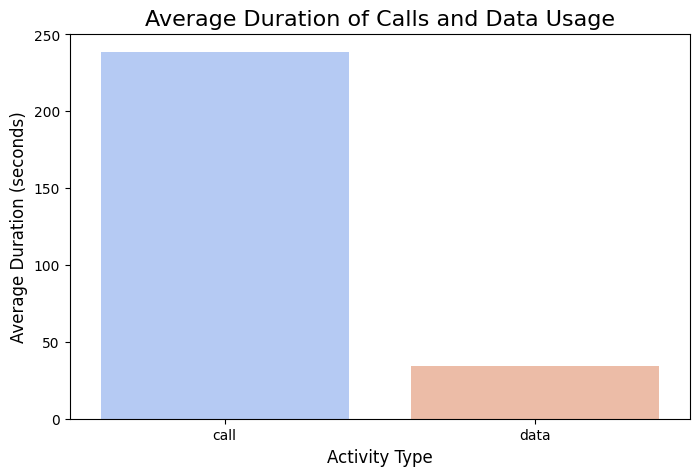

In [90]:
# the duration differ between calls and data usage
# Filter data for calls and data sessions
activity_type = data[data['item'].isin(['call', 'data'])]

# Group by activity type and calculate the average duration
duration_difference = activity_type.groupby('item')['duration'].mean().reset_index()
duration_difference.columns = ['Activity Type', 'Average Duration']

print(duration_difference)

# Visualize the difference using a bar plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.barplot(x='Activity Type', y='Average Duration', data=duration_difference, palette='coolwarm')
plt.title('Average Duration of Calls and Data Usage', fontsize=16)
plt.xlabel('Activity Type', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.show()


**Network Analysis**

Which networks are most commonly used?

How does the network type (mobile, data) influence usage patterns?

Are there specific networks preferred during certain times of the day?

In [91]:
# Apllying valuecounts to find Most commonly used network

common_network = data['network'].value_counts().idxmax()
common_network

'Three'

In [92]:
networks_types = data[data['network_type'].isin(['mobile','data'])]

networks_types_influence = networks_types.groupby('network_type')['network_type'].value_counts()
networks_types_influence

,count
network_type,
data,150
mobile,537


  network  time_slot  total_usage  usage_count
0  Meteor  Afternoon       2240.0           18
1  Meteor    Evening       2827.0           14
2  Meteor    Morning       1544.0           18
3  Meteor      Night        616.0           31
4   Tesco  Afternoon       3140.0           14


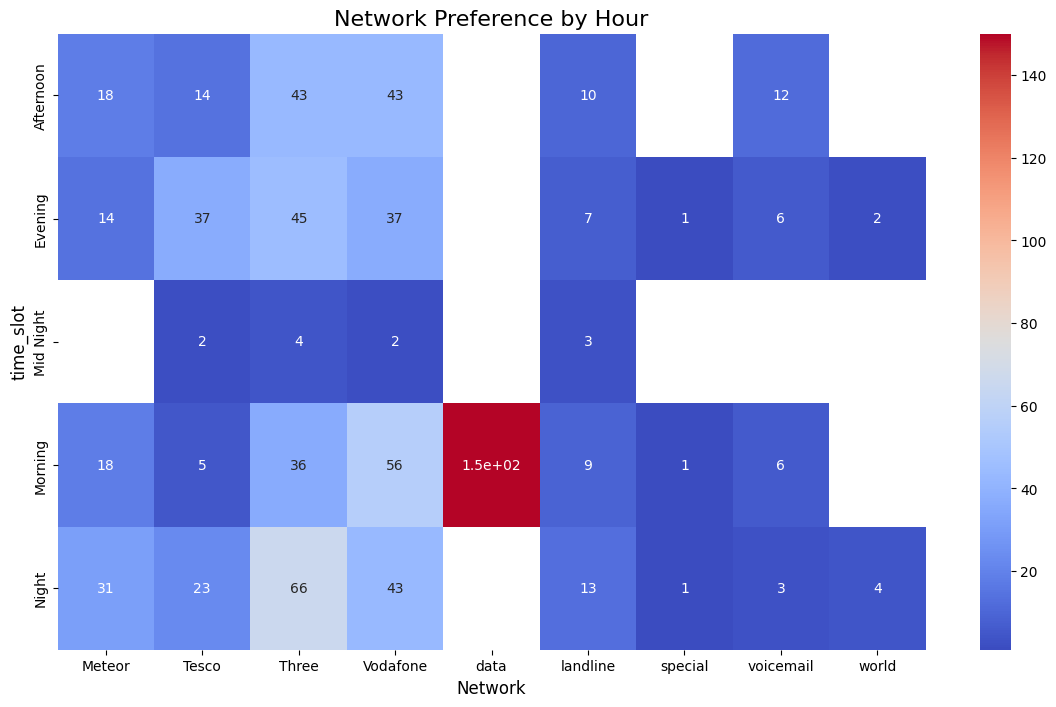

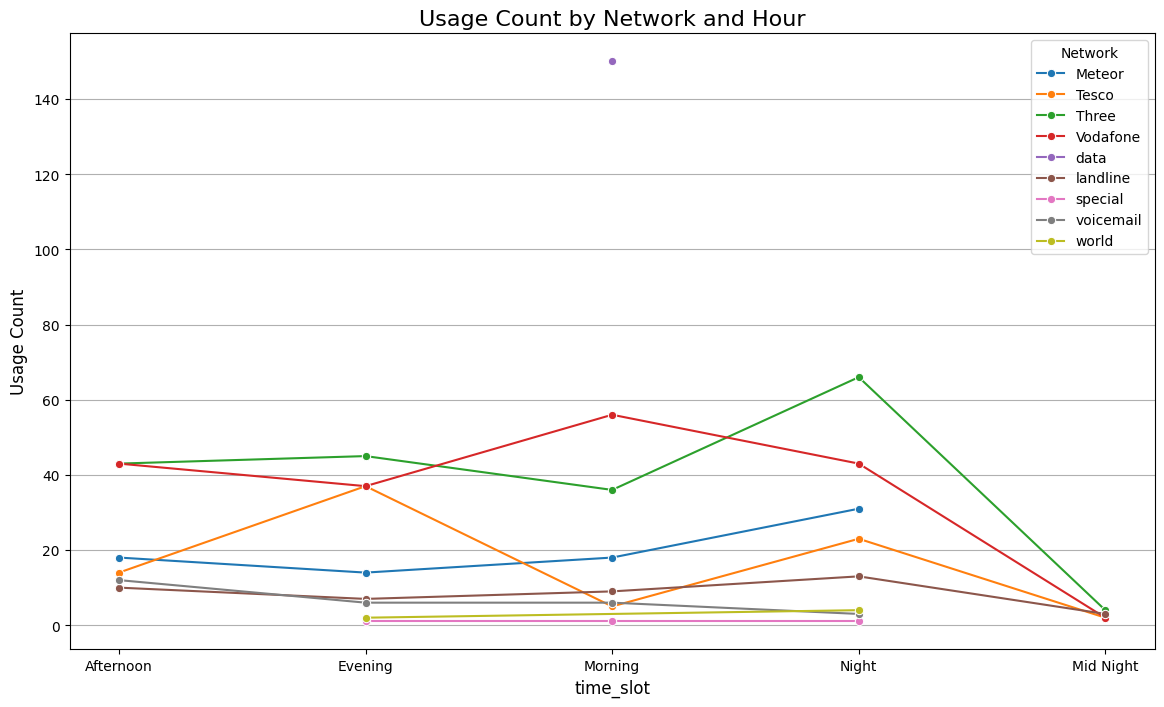

In [98]:
# Grouping by network and hour to analyze preferences
network_time_analysis = data.groupby(['network', 'time_slot']).agg(
    total_usage=('duration', 'sum'),
    usage_count=('network', 'count')
).reset_index()

# Display the analysis
print(network_time_analysis.head())

# Pivot table for visualization
pivot_network_hour = network_time_analysis.pivot(
    index='time_slot', columns='network', values='usage_count'
)

# Heatmap for network preference by hour
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 8))
sns.heatmap(pivot_network_hour, cmap='coolwarm', annot=True)
plt.title('Network Preference by Hour', fontsize=16)
plt.xlabel('Network', fontsize=12)
plt.ylabel('time_slot', fontsize=12)
plt.show()

# Line plot to visualize trends
plt.figure(figsize=(14, 8))
sns.lineplot(x='time_slot', y='usage_count', hue='network', data=network_time_analysis, marker='o', palette='tab10')
plt.title('Usage Count by Network and Hour', fontsize=16)
plt.xlabel('time_slot', fontsize=12)
plt.ylabel('Usage Count', fontsize=12)
plt.legend(title='Network')
plt.grid(axis='y')
plt.show()


**Correlation Analysis**

Is there a correlation between usage duration and network type?

Does the type of activity correlate with the time of day or day of the week?

<ipython-input-99-c4d0e306cc8c>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='network_type', y='duration', data=network_duration, palette='Set2')


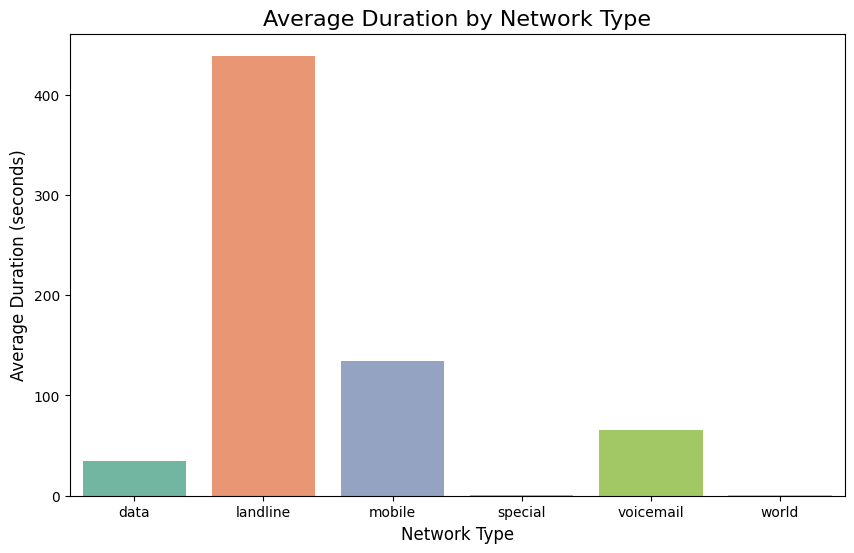

In [99]:
network_duration = data.groupby('network_type')['duration'].mean().reset_index()

# Step 2: Visualize the average duration by network type
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='network_type', y='duration', data=network_duration, palette='Set2')
plt.title('Average Duration by Network Type', fontsize=16)
plt.xlabel('Network Type', fontsize=12)
plt.ylabel('Average Duration (seconds)', fontsize=12)
plt.show()

<Figure size 1200x600 with 0 Axes>

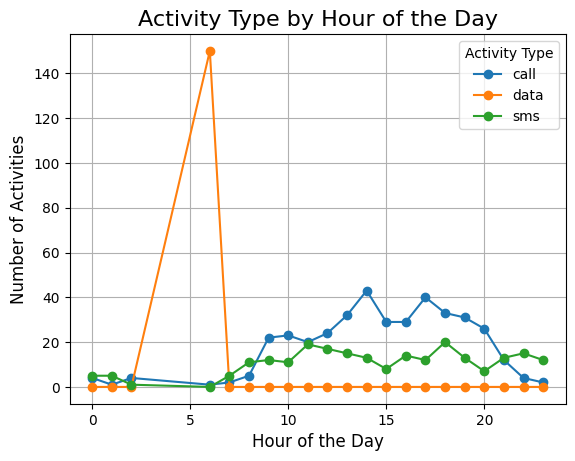

In [100]:
# Step 2: Group by activity type and hour of the day, then count the number of activities

activity_by_hour = data.groupby(['hour', 'item']).size().unstack().fillna(0)

# Step 3: Plotting activity type by hour of day
plt.figure(figsize=(12, 6))
activity_by_hour.plot(kind='line', marker='o')
plt.title('Activity Type by Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Activities', fontsize=12)
plt.legend(title='Activity Type')
plt.grid(True)
plt.show()

#**Conclusion:**

Through a detailed exploration of the phone usage data, several key insights were derived, leading to actionable recommendations across various aspects of network management, customer satisfaction, and service optimization. The analysis covered operational insights, forecasting, service improvements, discrepancy analysis, and the impact of external factors. Here is a summary of the conclusions:

**Operational Insights:**

* Peak Usage Times: Identifying peak usage periods, such as specific hours of the day, days of the week, or months, enables network operators to optimize resource allocation during times of congestion. Proactively scaling up network capacity during these periods can mitigate service slowdowns and improve user experience

* Network Performance:The correlation between network type and usage patterns highlights the need for network-specific optimizations. For example, mobile networks may experience heavier call usage during certain times of the day, while data networks may peak at different times based on user activity.

**Forecasting and Prediction:**

*   Forecasting Usage Trends: By analyzing historical data, it is possible to forecast future usage trends, such as peak data usage periods or high call volumes. Predictive models can help anticipate demand and adjust network resources accordingly.

*   Predicting Customer Behavior:
Usage data can be leveraged to predict individual customer behaviors, such as their likelihood to exceed usage limits or make specific types of calls. This prediction can be used to offer personalized plans and prevent service interruptions.

**Service Improvements:**

*   Network Optimization: Understanding which times and activities (calls, data usage) lead to network congestion allows telecom providers to optimize their infrastructure, balancing load and improving service quality.

*   Customized Offerings: Based on activity types, user preferences, and usage behaviors, telecom companies can create personalized data and call plans. Customizing offers can lead to higher customer satisfaction and retention by meeting the specific needs of different customer segments.

*  Customer Support: Targeting peak usage periods for increased customer support availability helps improve the overall customer experience during high-demand times, reducing frustration and increasing brand loyalty.

**Discrepancy Analysis:**


* Activity Type and Network Discrepancies: Analyzing discrepancies in usage between different network types (mobile, data) and activity types (calls, data usage) provides insight into which activities are underperforming and which need additional resources. This can guide investments in network infrastructure to enhance performance where it is most needed.

* User Behavior Variations: Discrepancies in user activity patterns based on factors like time of day, day of the week, or activity type can lead to further optimization. Identifying these discrepancies helps telecom companies avoid over- or under-provisioning resources, ensuring efficient operation.

**Impact of External Factors:**

* Time of Day and Network Preferences: External factors such as the time of day and the type of activity (data vs. call) have a strong impact on network performance. For example, mobile networks experience higher call volumes during business hours, while data consumption may peak during leisure times. Adapting service offerings and network capacity based on these patterns helps in providing a seamless experience.

* External Events or Seasons: Usage patterns also vary with external factors such as holidays, special events, or seasons. During major events, data and call usage may surge, necessitating adaptive strategies to ensure sufficient capacity and reduce congestion.

**Recommendations for Improvement:**

* Dynamic Resource Allocation: Telecom providers should invest in dynamic network management systems that can scale based on real-time data to manage congestion effectively and reduce bottlenecks during peak usage times.

* Personalized Customer Plans: By leveraging predictive analytics, providers can create custom plans tailored to users’ individual usage patterns, improving customer satisfaction and retention.

* Data-Driven Customer Support: Using data-driven insights, providers can offer proactive customer support, notifying users about potential overages or offering customized deals during peak usage times.

* Behavior-Based Promotions: The data can be used to design personalized plans or promotional offers, such as discounts for users who tend to use more data during off-peak hours or who engage with specific types of activities.


This phone data analysis project highlights the importance of understanding user behavior and leveraging historical usage patterns for operational optimization, customer retention, and service enhancements. Through effective forecasting, anomaly detection, and tailored service offerings, telecom providers can ensure a more efficient and customer-centric approach to network management and user satisfaction.



# ***Hurrah! You have successfully completed your Exploratory Data Analysis Capstone Project !!!***